# Using the dysts database to investigate the connection between symbolic regression and invariant manifolds

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
from dysts.base import make_trajectory_ensemble
from dysts.base import get_attractor_list
import dysts.flows as flows
import dysts.datasets as datasets
import time

from utils import *

import pysindy as ps

# Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# Seed the random number generators for reproducibility
np.random.seed(100)

# Chaotic System Initialization

This experiment include 73 chaotic, polynomially nonlinear systems provided by the database from William Gilpin. "Chaos as an interpretable benchmark for forecasting and data-driven modelling" Advances in Neural Information Processing Systems (NeurIPS) 2021 https://arxiv.org/abs/2110.05266.

In [2]:
t1 = time.time()

# system list of the polynomially nonlinear systems in the dysts database
# Something seems really off about the AtmosphericRegime, so omitting for now!
systems_list = ["Aizawa", "Bouali2", # "AtmosphericRegime", # Arneodo does not Lyapunov Spectrum calculated
                "GenesioTesi", "HyperBao", "HyperCai", "HyperJha", 
                "HyperLorenz", "HyperLu", "HyperPang", "Laser",
                "Lorenz", "LorenzBounded", "MooreSpiegel", "Rossler", "ShimizuMorioka",
                "HenonHeiles", "GuckenheimerHolmes", "Halvorsen", "KawczynskiStrizhak",
                "VallisElNino", "RabinovichFabrikant", "NoseHoover", "Dadras", "RikitakeDynamo",
                "NuclearQuadrupole", "PehlivanWei", "SprottTorus", "SprottJerk", "SprottA", "SprottB",
                "SprottC", "SprottD", "SprottE", "SprottF", "SprottG", "SprottH", "SprottI", "SprottJ",
                "SprottK", "SprottL", "SprottM", "SprottN", "SprottO", "SprottP", "SprottQ", "SprottR",
                "SprottS", "Rucklidge", "Sakarya", "RayleighBenard", "Finance", "LuChenCheng",
                "LuChen", "QiChen", "ZhouChen", "BurkeShaw", "Chen", "ChenLee", "WangSun", "DequanLi",
                "NewtonLiepnik", "HyperRossler", "HyperQi", "Qi", "LorenzStenflo", "HyperYangChen", 
                "HyperYan", "HyperXu", "HyperWang", "Hadley", "HindmarshRose",
               ]
alphabetical_sort = np.argsort(systems_list)
systems_list = np.array(systems_list)[alphabetical_sort]

# attributes list
attributes = [
    "maximum_lyapunov_estimated",
    "lyapunov_spectrum_estimated",
    "embedding_dimension",
    "parameters",
    "dt",
    "hamiltonian",
    "period",
    "unbounded_indices"
]

# Get attributes
all_properties = dict()
for i, equation_name in enumerate(systems_list):
    eq = getattr(flows, equation_name)()
    attr_vals = [getattr(eq, item, None) for item in attributes]
    all_properties[equation_name] = dict(zip(attributes, attr_vals))
    print(i, equation_name, all_properties[equation_name])
    
    
# Get training and testing trajectories for all the experimental systems 
all_sols_train, all_t_train, all_sols_test, all_t_test = load_data(
    systems_list, all_properties, 
    n=5000, pts_per_period=200,
    random_bump=False,
)
test_trajectories, test_trajectories_time = make_test_trajectories(
    systems_list,
    all_properties,
    n=2000,
    pts_per_period=20,
    random_bump=False,
    include_transients=False,
    approximate_center=0.0,  # approximate center of the attractor
    n_trajectories=10,
)
        
t2 = time.time()
print('Took ', t2 - t1, ' seconds to load the systems')

0 Aizawa {'maximum_lyapunov_estimated': 0.08947878317195473, 'lyapunov_spectrum_estimated': [0.08947878317195473, 0.020305496211675024, -0.3090729926541944], 'embedding_dimension': 3, 'parameters': {'a': 0.95, 'b': 0.7, 'c': 0.6, 'd': 3.5, 'e': 0.25, 'f': 0.1}, 'dt': 0.0009043, 'hamiltonian': False, 'period': 2.5837, 'unbounded_indices': []}
1 Bouali2 {'maximum_lyapunov_estimated': 0.02038922500462878, 'lyapunov_spectrum_estimated': [0.020389225004628773, 0.0033455417942589724, -0.009602768742817189], 'embedding_dimension': 3, 'parameters': {'a': 3.0, 'b': 2.2, 'bb': 0, 'c': 0, 'g': 1.0, 'm': -0.0026667, 'y0': 1.0}, 'dt': 0.0004124, 'hamiltonian': False, 'period': 2.6779, 'unbounded_indices': []}
2 BurkeShaw {'maximum_lyapunov_estimated': 2.3453555864112117, 'lyapunov_spectrum_estimated': [2.3453555864112117, 0.027056468824027846, -11.225316054517004], 'embedding_dimension': 3, 'parameters': {'e': 13, 'n': 10}, 'dt': 0.0001175, 'hamiltonian': False, 'period': 0.78333, 'unbounded_indice

27 Laser {'maximum_lyapunov_estimated': 0.7637435195473311, 'lyapunov_spectrum_estimated': [0.7637435195473311, 0.020943250302999646, -15.909545615344538], 'embedding_dimension': 3, 'parameters': {'a': 10.0, 'b': 1.0, 'c': 5.0, 'd': -1.0, 'h': -5.0, 'k': -6.0}, 'dt': 8.52e-05, 'hamiltonian': False, 'period': 0.94667, 'unbounded_indices': []}
28 Lorenz {'maximum_lyapunov_estimated': 1.0910931847726466, 'lyapunov_spectrum_estimated': [1.0910931847726466, 0.02994120961308413, -14.915552395875103], 'embedding_dimension': 3, 'parameters': {'beta': 2.667, 'rho': 28, 'sigma': 10}, 'dt': 0.0001801, 'hamiltonian': False, 'period': 1.5008, 'unbounded_indices': []}
29 LorenzBounded {'maximum_lyapunov_estimated': 0.8497533717540197, 'lyapunov_spectrum_estimated': [0.8497533717540197, 0.001413707285345669, -12.120634680260636], 'embedding_dimension': 3, 'parameters': {'beta': 2.667, 'r': 64, 'rho': 28, 'sigma': 10}, 'dt': 0.0002606, 'hamiltonian': False, 'period': 1.3716, 'unbounded_indices': []}
3

53 SprottG {'maximum_lyapunov_estimated': 0.03349131570257799, 'lyapunov_spectrum_estimated': [0.03349131570257798, -0.0012749369106980868, -0.6182204265060449], 'embedding_dimension': 3, 'parameters': {'a': 0.4}, 'dt': 0.00216, 'hamiltonian': False, 'period': 8.7097, 'unbounded_indices': []}
54 SprottH {'maximum_lyapunov_estimated': 0.13871794302385682, 'lyapunov_spectrum_estimated': [0.13871794302385684, 0.003501431527456669, -0.5889065665901029], 'embedding_dimension': 3, 'parameters': {'a': 0.5}, 'dt': 0.001416, 'hamiltonian': False, 'period': 20.229, 'unbounded_indices': []}
55 SprottI {'maximum_lyapunov_estimated': 0.020459651934364873, 'lyapunov_spectrum_estimated': [0.020459651934364873, 9.478591964272237e-06, -1.031514712617076], 'embedding_dimension': 3, 'parameters': {'a': 0.2}, 'dt': 0.003104, 'hamiltonian': False, 'period': 10.93, 'unbounded_indices': []}
56 SprottJ {'maximum_lyapunov_estimated': 0.04451808076432957, 'lyapunov_spectrum_estimated': [0.04451808076432957, 0.0

28 Lorenz(name='Lorenz', params={'beta': 2.667, 'rho': 28, 'sigma': 10}, random_state=None)
29 LorenzBounded(name='LorenzBounded', params={'beta': 2.667, 'r': 64, 'rho': 28, 'sigma': 10}, random_state=None)
30 LorenzStenflo(name='LorenzStenflo', params={'a': 2, 'b': 0.7, 'c': 26, 'd': 1.5}, random_state=None)
31 LuChen(name='LuChen', params={'a': 36, 'b': 3, 'c': 18}, random_state=None)
32 LuChenCheng(name='LuChenCheng', params={'a': -10, 'b': -4, 'c': 18.1}, random_state=None)
33 MooreSpiegel(name='MooreSpiegel', params={'a': 10, 'b': 4, 'eps': 9}, random_state=None)
34 NewtonLiepnik(name='NewtonLiepnik', params={'a': 0.4, 'b': 0.175}, random_state=None)
35 NoseHoover(name='NoseHoover', params={'a': 1.5}, random_state=None)
36 NuclearQuadrupole(name='NuclearQuadrupole', params={'a': 1.0, 'b': 0.55, 'd': 0.4}, random_state=None)
37 PehlivanWei(name='PehlivanWei', params={}, random_state=None)
38 Qi(name='Qi', params={'a': 45, 'b': 10, 'c': 1, 'd': 10}, random_state=None)
39 QiChen(name

51 SprottE(name='SprottE', params={}, random_state=None)
52 SprottF(name='SprottF', params={'a': 0.5}, random_state=None)
53 SprottG(name='SprottG', params={'a': 0.4}, random_state=None)
54 SprottH(name='SprottH', params={'a': 0.5}, random_state=None)
55 SprottI(name='SprottI', params={'a': 0.2}, random_state=None)
56 SprottJ(name='SprottJ', params={}, random_state=None)
57 SprottJerk(name='SprottJerk', params={'mu': 2.017}, random_state=None)
58 SprottK(name='SprottK', params={'a': 0.3}, random_state=None)
59 SprottL(name='SprottL', params={'a': 0.9, 'b': 3.9}, random_state=None)
60 SprottM(name='SprottM', params={'a': 1.7}, random_state=None)
61 SprottN(name='SprottN', params={}, random_state=None)
62 SprottO(name='SprottO', params={'a': 2.7}, random_state=None)
63 SprottP(name='SprottP', params={'a': 2.7}, random_state=None)
64 SprottQ(name='SprottQ', params={'a': 3.1, 'b': 0.5}, random_state=None)
65 SprottR(name='SprottR', params={'a': 0.9, 'b': 0.4}, random_state=None)
66 SprottS

# Calculate the true coefficients
Function from utils.py file reads in all the dysts database functions defining the systems of ODEs, and extracts all the coefficients.

In [3]:
num_attractors = len(systems_list)

lyap_list = []
dimension_list = []
param_list = []
# Calculate scale separation
scale_list = []
linear_scale_list = []

for system in systems_list:
    lyap_list.append(all_properties[system]['maximum_lyapunov_estimated'])
    dimension_list.append(all_properties[system]['embedding_dimension'])
    param_list.append(all_properties[system]['parameters'])
    # Ratio of largest to smallest timescales
    # scale_list.append(all_properties[system]['period'] / all_properties[system]['dt'])


true_coefficients = make_dysts_true_coefficients(systems_list, 
                                                 all_sols_train, 
                                                 dimension_list, 
                                                 param_list)

# Want ratio of largest to smallest LINEAR or LYAPUNOV EXPONENT timescales 
for i, system in enumerate(systems_list):
    linear_coefs = true_coefficients[i][:, :dimension_list[i]] 
    max_linear = np.max(abs(linear_coefs))
    min_linear = np.min(abs(linear_coefs[linear_coefs != 0.0]))
    linear_scale_list.append(max_linear / min_linear)
    # print(all_properties[system]['lyapunov_spectrum_estimated'])
    sorted_spectrum = np.sort((np.array(all_properties[system]['lyapunov_spectrum_estimated'])))
    print(sorted_spectrum, np.sum(np.array(sorted_spectrum > 0.0, dtype=int)))
    lambda_max = sorted_spectrum[-1]
    lambda_min = sorted_spectrum[0]

    #print(i, system, all_properties[system]['lyapunov_spectrum_estimated'])
    scale_list.append(lambda_max / lambda_min)
    print(i, system, scale_list[i])


[-0.30907299  0.0203055   0.08947878] 2
0 Aizawa -0.28950696210479915
[-0.00960277  0.00334554  0.02038923] 2
1 Bouali2 -2.123265232215426
[-11.22531605   0.02705647   2.34535559] 2
2 BurkeShaw -0.20893448122268715
[-11.8418162   -0.05031354   2.04712088] 1
3 Chen -0.17287220522295782
[-5.48532990e+00  1.82257698e-04  1.64606311e-01] 2
4 ChenLee -0.030008461465073324
[-1.11577255e+01  6.45627203e-03  4.73442331e-01] 2
5 Dadras -0.04243179571017142
[-2.86718544  0.09866429  1.86019634] 2
6 DequanLi -0.6487882904199249
[-0.62795259  0.00098358  0.10708598] 2
7 Finance -0.1705319572310257
[-5.28223126e-01  3.81466766e-04  9.97438177e-02] 2
8 GenesioTesi -0.18882894904469258
[-0.92161356 -0.00321918  0.34082004] 1
9 GuckenheimerHolmes -0.3698079648585561
[-0.42739318 -0.00108388  0.31166134] 1
10 Hadley -0.7292145827553481
[-4.6876301  -0.03195395  0.58619715] 1
11 Halvorsen -0.12505192137208004
[-1.11510414e-02 -1.40571139e-05  1.15008911e-02  2.67471542e-02] 2
12 HenonHeiles -2.398623881

## Trajectory Visualization
Visualizing the training and testing trajectories helps us verify if the time series data is coming from the strange attractors or from transients in the evolution.

Took  0.9261298179626465  seconds to plot the systems


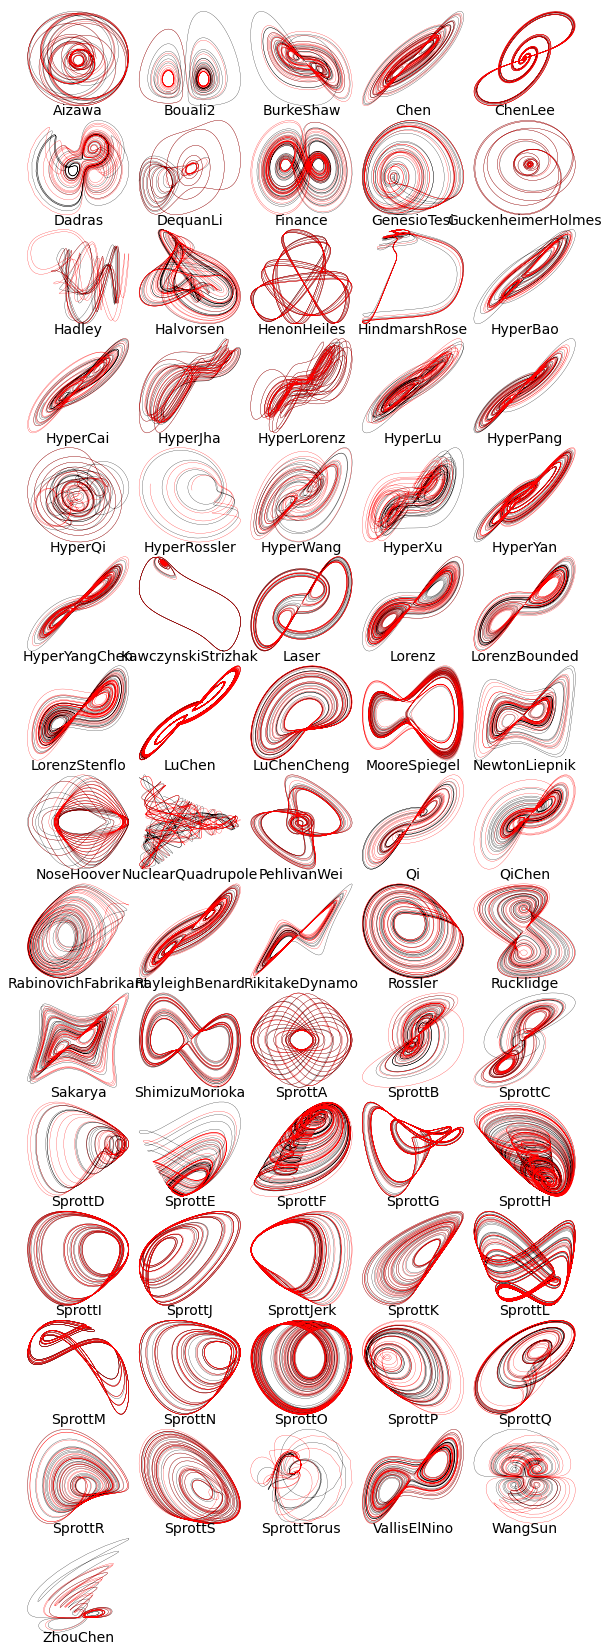

In [4]:
t1 = time.time()

# Plot the training and testing trajectories for all the chaotic systems
num_cols = 5
num_rows = int(np.ceil(len(all_sols_train) / num_cols))
fig = plt.figure(figsize=(num_cols * 2, num_rows * 2))

gs = plt.matplotlib.gridspec.GridSpec(num_rows, num_cols)
gs.update(wspace=0.0, hspace=0.05) 

for i, attractor_name in enumerate(all_sols_train):
    
    x_train = all_sols_train[attractor_name]
    x_test = all_sols_test[attractor_name]
    t_train = all_t_train[attractor_name]
    t_test = all_t_test[attractor_name]
    
    plt.subplot(gs[i])
    plt.plot(x_train[:, 0], x_train[:, 1], 'k'
             , linewidth=0.25)
    plt.plot(x_test[:, 0], x_test[:, 1], 'r', linewidth=0.25)
    plt.title(attractor_name, y=-0.1, fontsize=14)
    plt.gca().axis('off')
            
# plt.savefig('polynomial_attractors.jpg')
# plt.savefig('polynomial_attractors.pdf')
t2 = time.time()
print('Took ', t2 - t1, ' seconds to plot the systems')

Took  1.2622392177581787  seconds to plot the systems


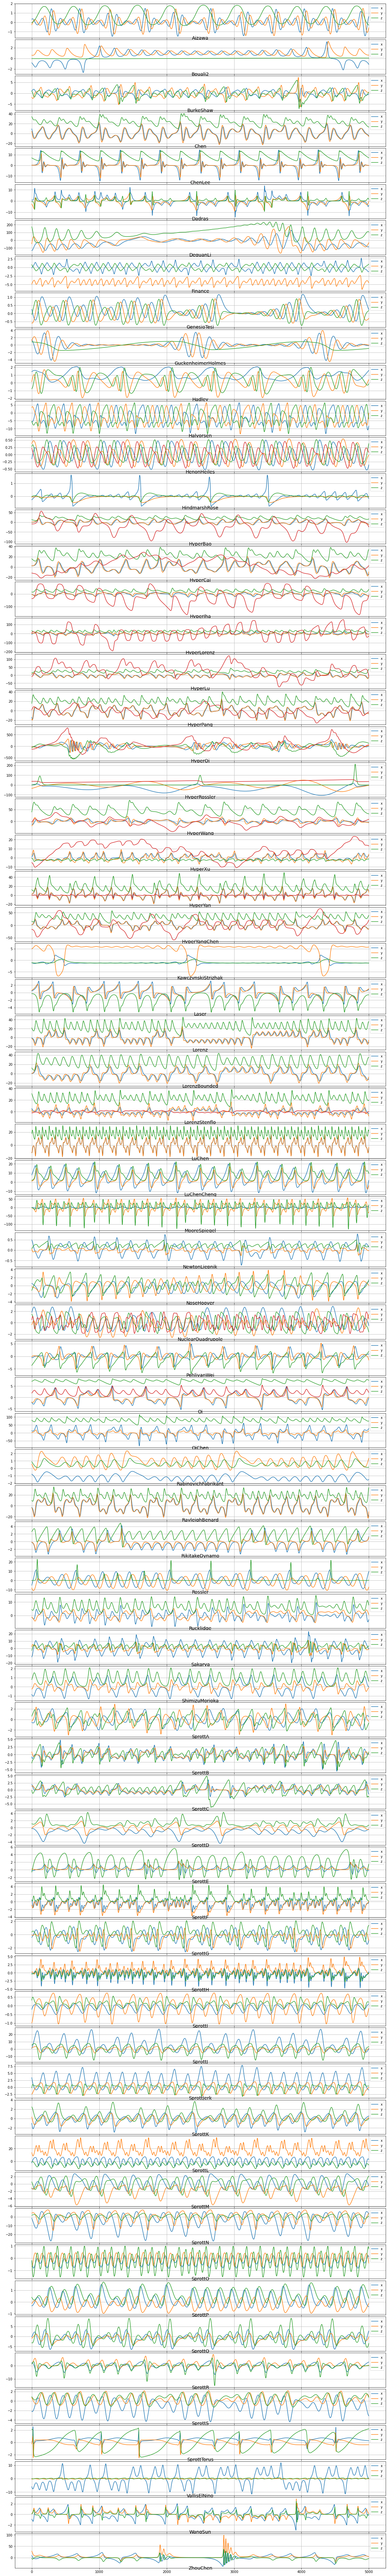

In [5]:
t1 = time.time()

# Plot the training and testing trajectories for all the chaotic systems
num_cols = 1
num_rows = len(all_sols_train)
fig = plt.figure(figsize=(20, num_rows * 2))

gs = plt.matplotlib.gridspec.GridSpec(num_rows, num_cols)
gs.update(wspace=0.0, hspace=0.05) 

for i, attractor_name in enumerate(all_sols_train):
    
    x_train = all_sols_train[attractor_name]
    t_train = all_t_train[attractor_name]
    
    plt.subplot(gs[i])
    for j in range(dimension_list[i]):
        #plt.subplot(gs[i + j])
        plt.plot(x_train[:, j])
        plt.grid(True)
    plt.title(attractor_name, y=-0.1, fontsize=14)
    #plt.gca().axis('off')
    plt.legend(['x', 'y', 'z'])
            
# plt.savefig('polynomial_attractors.jpg')
# plt.savefig('polynomial_attractors.pdf')
t2 = time.time()
print('Took ', t2 - t1, ' seconds to plot the systems')

# Use the RMSE errors of $\dot{x}$ on a testing trajectory to guide a hyperparameter scan for the best threshold to use in the STLSQ algorithm. 
This uses a modified "Rudy algorithm" where the best model at each iteration is the one that minimizes the sum of the normalized RMSE error of $\dot{x}$ on a test trajectory and the number of nonzero terms * the l0 penalty value. Note that some models will fail to produce correct models (as measured against the true coefficients) even in the noiseless case, unless the data is well sampled. We will use the results of this scan to run ensembling SINDy, which will allow us to conclude about the effects of scale separation. 

In [6]:
t1 = time.time()

# Note, defaults to Rudy Algorithm 2 using the x_dot RMSE error
# as the metric for success. Use coef_error_metric = True to use
# the normalized coefficient error as the metric for success
(xdot_rmse_errors, xdot_coef_errors, x_dot_tests, x_dot_test_preds,
predicted_coefficients, best_threshold_values, 
best_normalized_coef_errors, models, condition_numbers) = Pareto_scan(
    systems_list, dimension_list, true_coefficients,
    all_sols_train, all_t_train, all_sols_test, all_t_test, l0_penalty=1e-5, 
    normalize_columns=True,
    # coef_error_metric=True
)
            
t2 = time.time()
print('Total time to compute = ', t2 - t1, ' seconds')
print('Condition numbers = ', condition_numbers)


0  /  71 , System =  Aizawa
1  /  71 , System =  Bouali2
2  /  71 , System =  BurkeShaw
3  /  71 , System =  Chen
4  /  71 , System =  ChenLee
5  /  71 , System =  Dadras
6  /  71 , System =  DequanLi
7  /  71 , System =  Finance
8  /  71 , System =  GenesioTesi
9  /  71 , System =  GuckenheimerHolmes
10  /  71 , System =  Hadley
11  /  71 , System =  Halvorsen
12  /  71 , System =  HenonHeiles
13  /  71 , System =  HindmarshRose
14  /  71 , System =  HyperBao
15  /  71 , System =  HyperCai
16  /  71 , System =  HyperJha
17  /  71 , System =  HyperLorenz
18  /  71 , System =  HyperLu
19  /  71 , System =  HyperPang
20  /  71 , System =  HyperQi
21  /  71 , System =  HyperRossler
22  /  71 , System =  HyperWang
23  /  71 , System =  HyperXu
24  /  71 , System =  HyperYan
25  /  71 , System =  HyperYangChen
26  /  71 , System =  KawczynskiStrizhak
27  /  71 , System =  Laser
28  /  71 , System =  Lorenz
29  /  71 , System =  LorenzBounded
30  /  71 , System =  LorenzStenflo
31  /  71 , S

### Normalized Error
Below, we can plot the individual coefficient errors for every system (but this is a lot of information and plots!) and we can plot the total normalized coefficient errors, RMSE errors, and best thresholds for each system, along with a linear fit (on a semi-log plot, so really an exponential fit) on the coefficient error. The fit indicates that scale separation and the invariant manifolds matter!

Aizawa
(x)' = -0.699 x + -3.499 y + 0.999 x z
(y)' = 3.499 x + -0.699 y + 0.999 y z
(z)' = 0.600 1 + 0.950 z + -1.000 x^2 + -1.000 y^2 + -0.250 x^2 z + -0.250 y^2 z + -0.333 z^3 + 0.100 x^3 z
Bouali2
(x)' = 3.006 x + -2.194 z + -3.011 x y + -0.040 y z + -0.001 x^3 + 0.006 x y^2 + -0.063 x z^2 + 0.047 y^2 z + 0.001 x^3 y + -0.001 x y^3 + -0.150 x y z^2 + -0.014 y^3 z
(y)' = -0.005 1 + -0.988 y + -0.009 y^2 + 0.647 z^2 + 0.999 x^2 y + 0.003 y^3 + -0.736 y z^2
(z)' = 0.004 x
BurkeShaw
(x)' = -9.987 x + -9.996 y + 0.003 x^2 y
(y)' = 1.009 y + -10.001 x z + 0.005 x^2 y + 0.007 x y^2 + 0.004 x^3 z
(z)' = 13.005 1 + -0.020 x^2 + 9.991 x y + 0.007 x y z + -0.003 x^3 y + -0.001 x^2 z^2
Chen
(x)' = -34.980 x + 34.980 y
(y)' = -7.024 x + 27.989 y + -0.999 x z
(z)' = -2.997 z + 0.999 x y
ChenLee
(x)' = 5.007 x + -0.071 y + 0.002 x z + -0.985 y z + -0.002 y z^2
(y)' = -0.006 x + -10.049 y + 1.005 x z + 0.005 y z
(z)' = -0.380 z + 0.331 x y + -0.002 y^2 + 0.001 x y z
Dadras
(x)' = -3.001 x + 0.999 y

/home/akaptano/pysindy/examples/16_noise_robustness/utils.py:261: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  labels = ["xdot", "ydot", "zdot", "wdot"]


HyperRossler
(x)' = -1.000 y + -1.000 z
(y)' = 0.001 1 + 1.000 x + 0.250 y + 1.000 x^2
(z)' = 3.006 1 + -0.196 z + 1.000 y^2 + 0.001 x^3 + 0.018 x y^2
(w)' = -0.500 z + 0.050 x^2
HyperWang
(x)' = -9.996 x + 9.996 y
(y)' = 40.170 x + -0.045 y + 1.000 x^2 + -1.008 y^2 + 0.001 x^3
(z)' = -0.200 1 + -2.483 z + 3.987 x y + 0.008 x z
(w)' = -10.598 x
HyperXu
(x)' = -9.990 x + 9.989 y + 0.999 x^2
(y)' = 40.226 x + -0.045 y + -0.006 x^2 + 16.197 y^2 + -0.014 x^3 + -0.003 x y^2 + -0.008 x z^2 + 0.052 x^3 z + 0.004 x y z^2
(z)' = -2.496 z + -0.998 x z
(w)' = -1.999 y + 1.000 y^2
HyperYan
(x)' = -37.063 x + 37.056 y + 0.093 x^2 + 0.006 y^2 + -0.005 x^3 + 0.001 x^2 y + -0.003 x y^2
(y)' = -10.062 x + 25.373 y + 1.510 x^2 + -1.072 y^2 + 0.032 x^3 + -0.092 x y^2 + -0.001 y z^2 + 0.002 x^3 z + -0.002 y^4 + 0.001 y^2 z^2
(z)' = -2.999 z + -1.196 x^2 + 0.005 x y + 0.987 x z + 1.012 y^2 + 0.007 z^2 + -1.008 x^3 + 0.026 x y^2 + -0.001 y z^2 + 0.002 x^3 y + -0.003 y^4 + 0.002 y z^3
(w)' = -37.902 x^2 + -0

SprottM
(x)' = -1.000 z
(y)' = -1.000 y + -1.000 x^2
(z)' = 1.699 1 + 1.700 x + 1.000 y
SprottN
(x)' = -2.000 y
(y)' = 1.000 x + 0.999 z^2
(z)' = 1.000 1 + 1.000 y + -1.999 z
SprottO
(x)' = 0.999 y
(y)' = 0.999 x + -0.999 z
(z)' = 0.997 x + 2.698 y + 0.997 x z
SprottP
(x)' = 2.699 y + 1.000 z
(y)' = -1.000 x + 1.000 y^2
(z)' = 1.000 x + 1.000 y
SprottQ
(x)' = -1.000 z
(y)' = 1.000 x + -1.000 y
(z)' = 3.099 x + 0.500 z + 1.000 y^2
SprottR
(x)' = 0.900 1 + -1.000 y
(y)' = 0.400 1 + 0.999 z
(z)' = -1.000 z + 0.999 x y
SprottS
(x)' = -1.000 x + -3.999 y
(y)' = 1.000 x + 1.000 z^2
(z)' = 1.000 1 + 1.000 x
SprottTorus
(x)' = -0.001 1 + 0.001 x + 1.005 y + 0.002 z + 2.006 x y + 1.005 x z + 0.001 y^2 + 0.001 z^2 + -0.021 x^2 y + -0.005 x^2 z + -0.002 x y^2 + -0.001 x y z + -0.001 x z^2 + 0.002 y^3 + 0.008 y^2 z + 0.003 y z^2 + -0.033 x^3 y + -0.020 x^3 z + -0.001 x y^3 + 0.013 x y^2 z + 0.010 x y z^2 + 0.001 x z^3
(y)' = 1.000 1 + -0.002 x + 0.002 y + -2.007 x^2 + -0.004 x y + -0.005 y^2 + 1.0

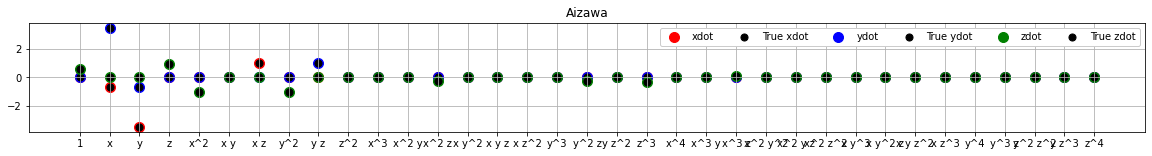

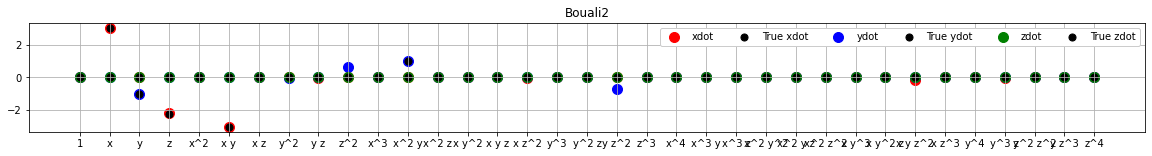

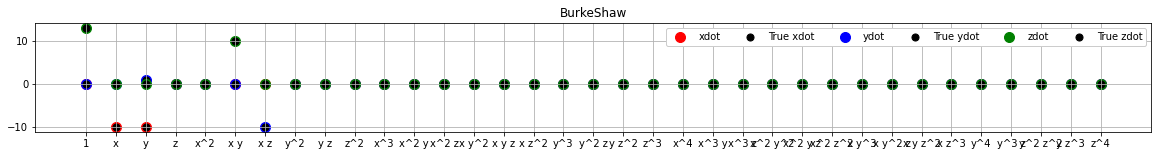

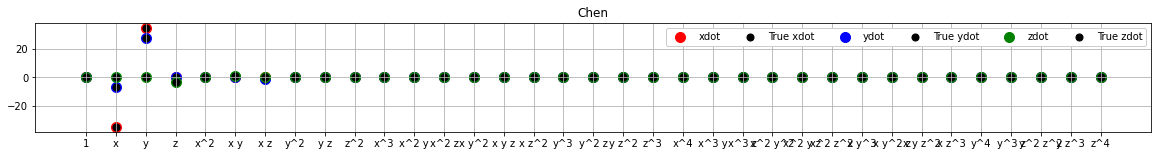

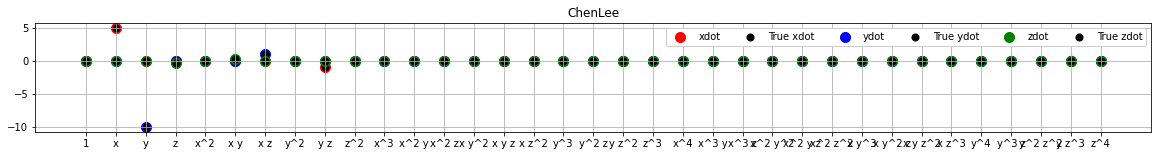

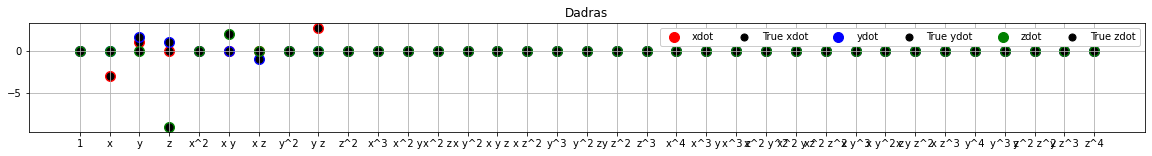

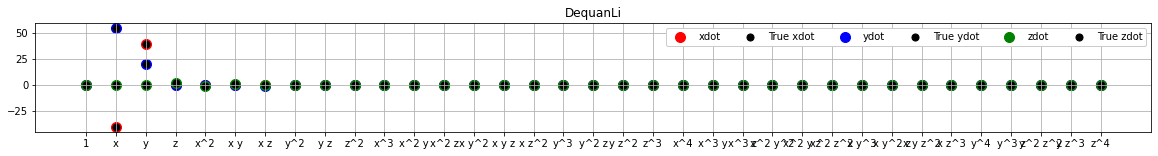

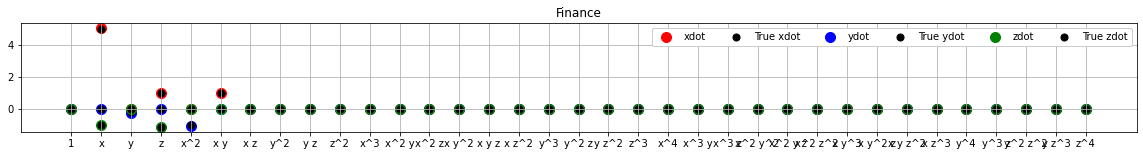

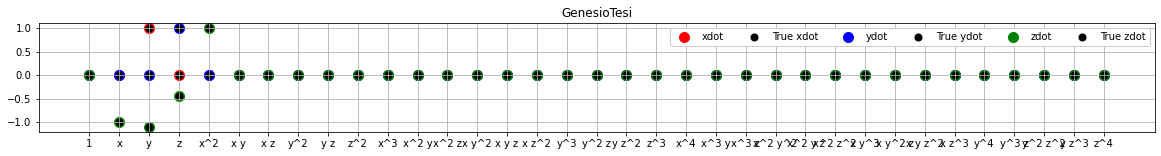

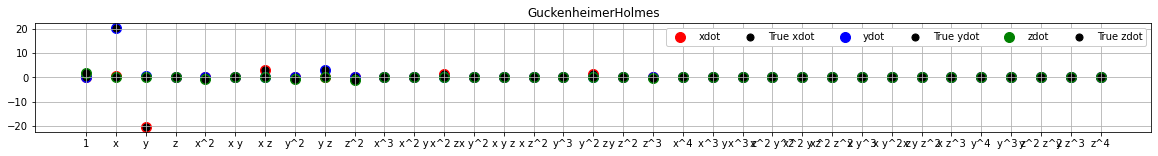

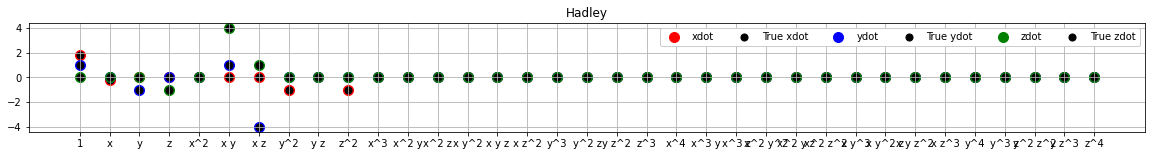

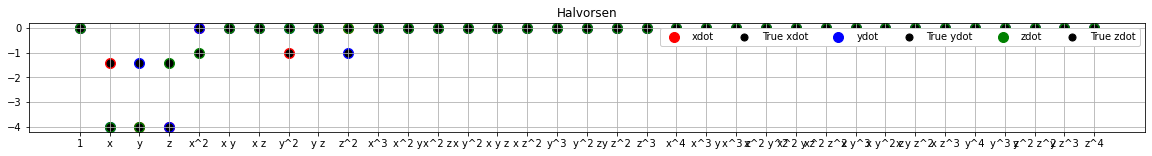

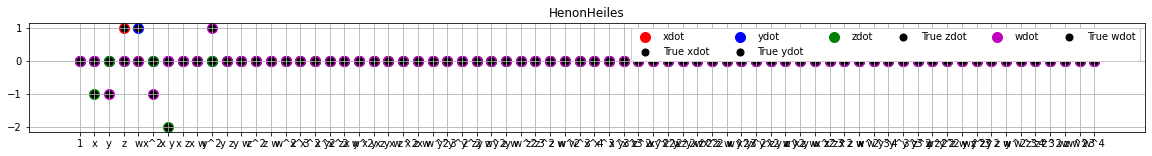

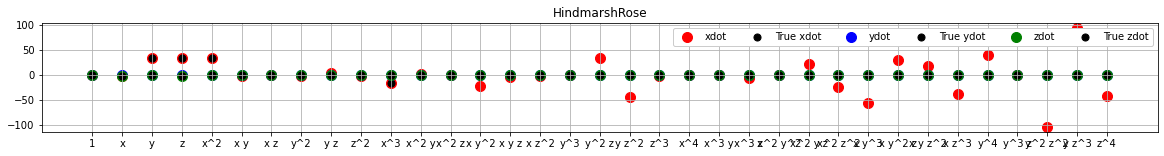

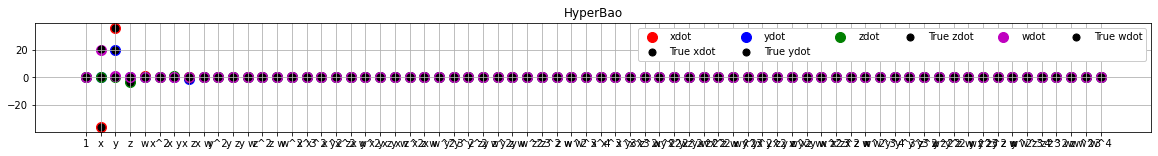

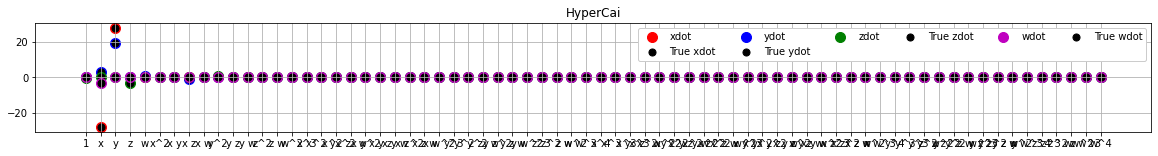

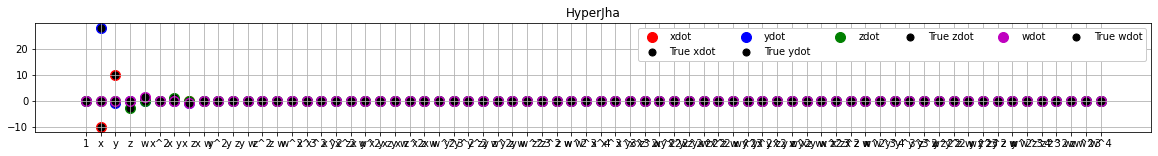

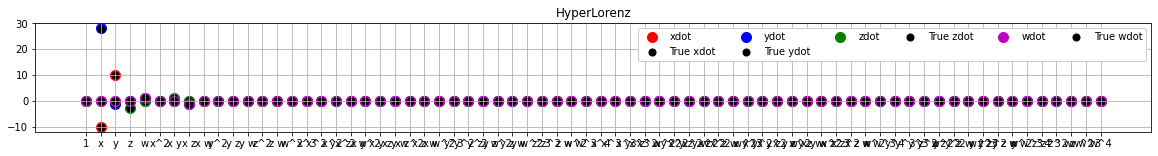

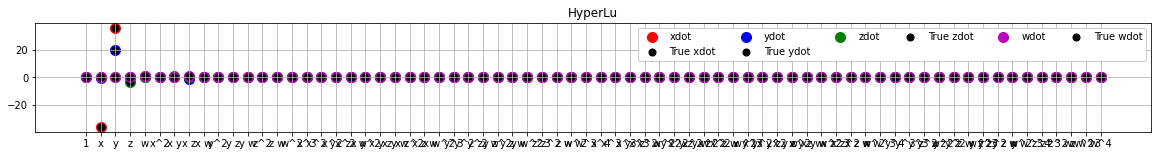

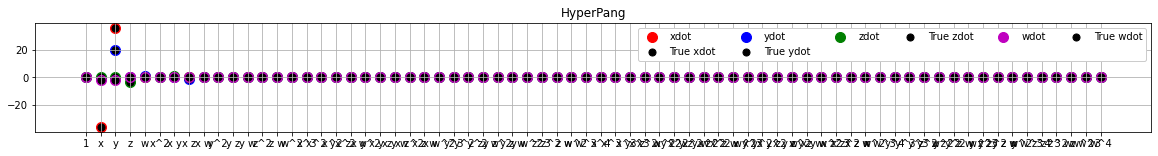

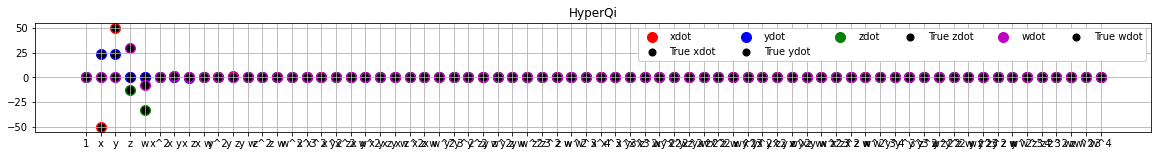

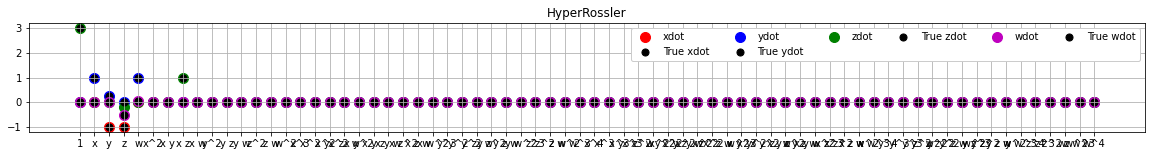

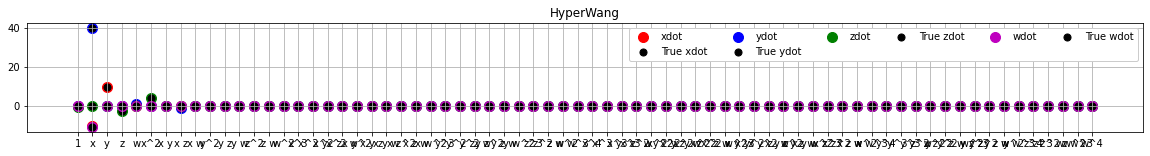

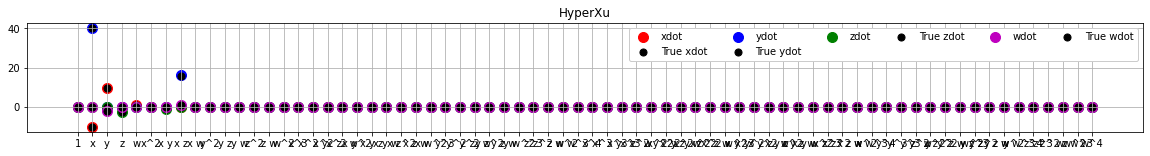

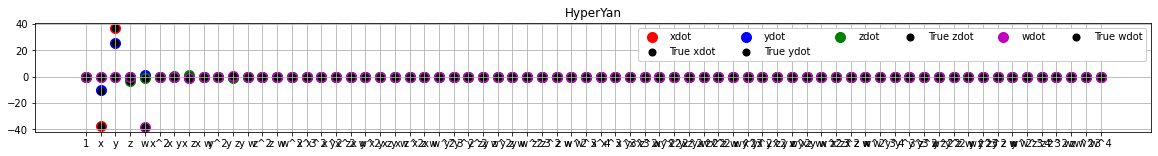

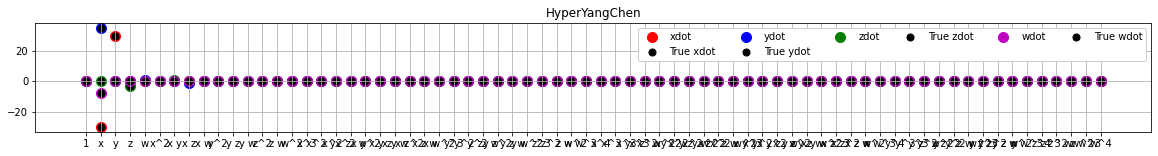

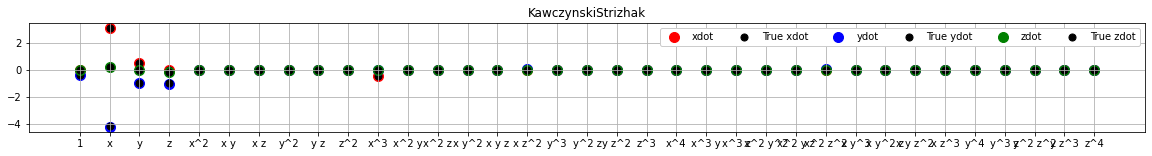

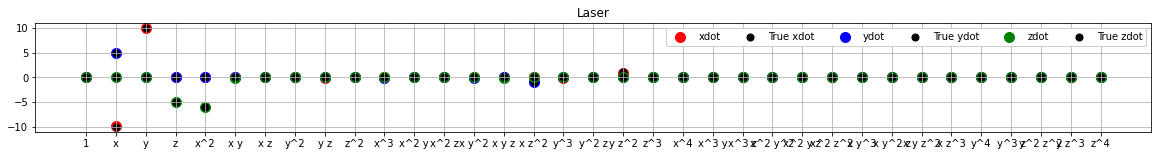

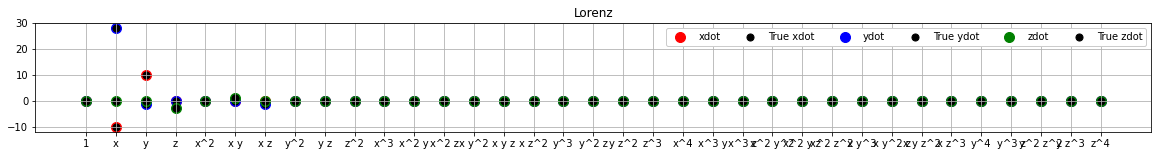

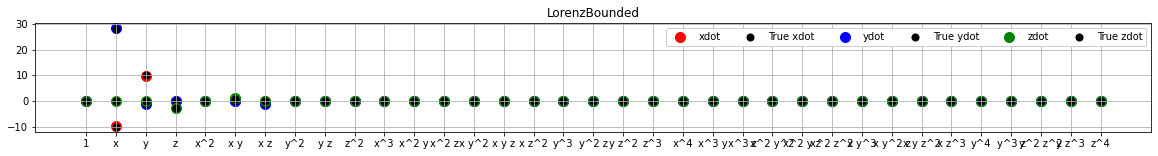

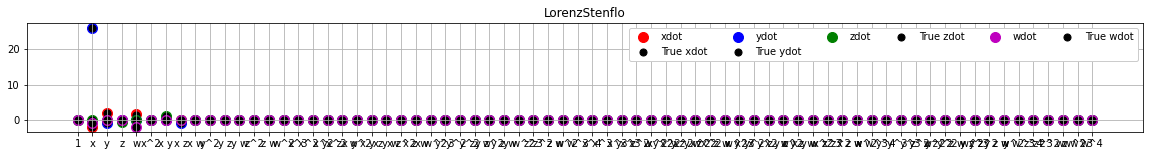

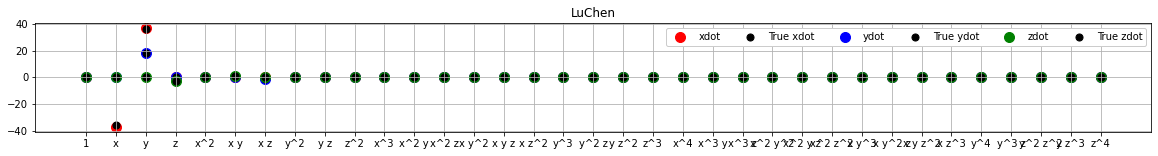

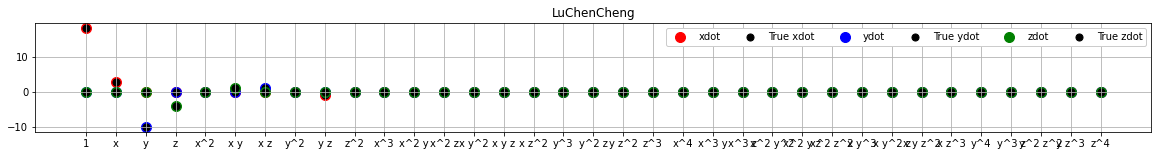

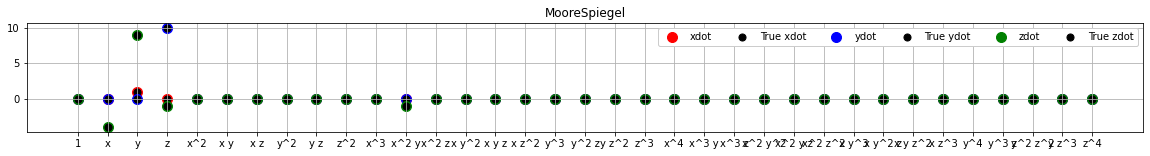

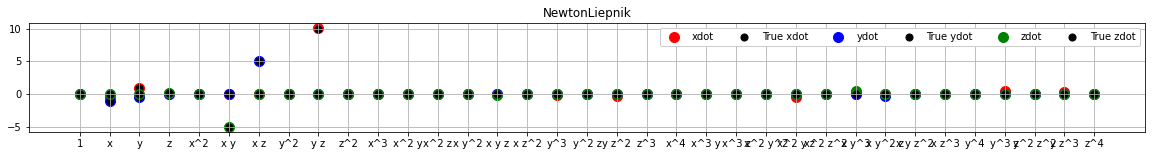

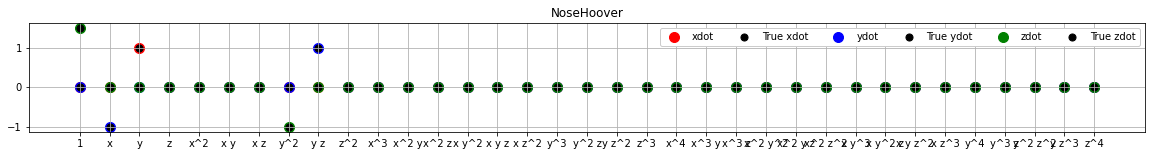

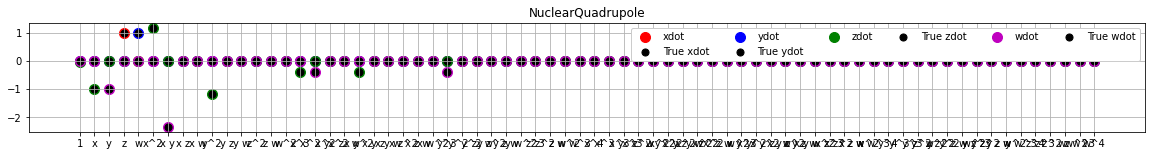

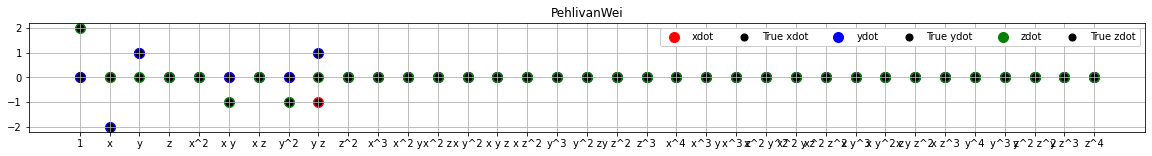

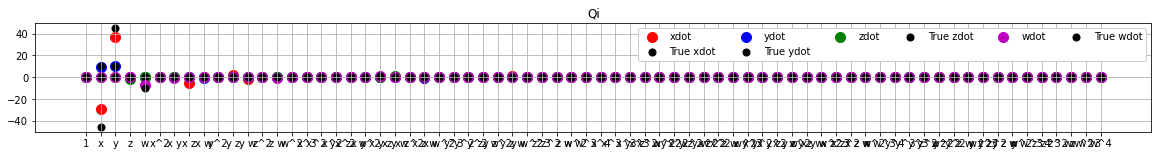

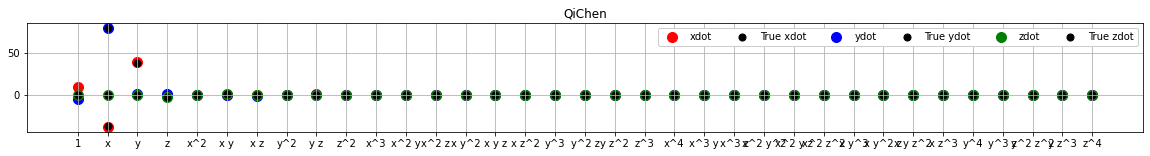

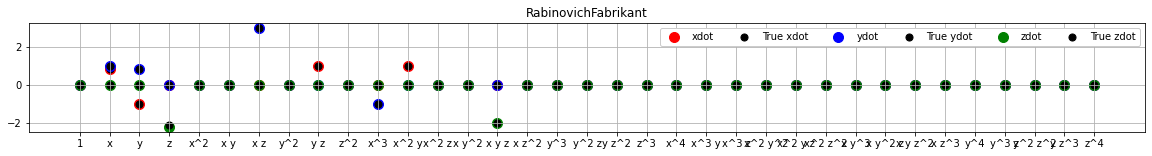

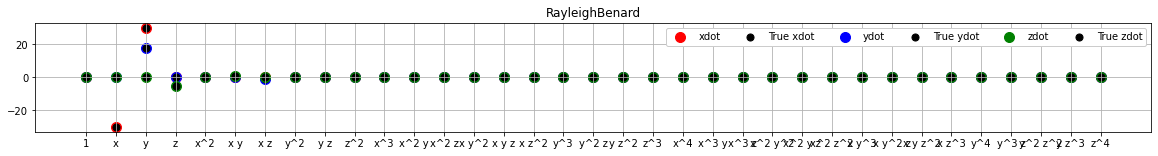

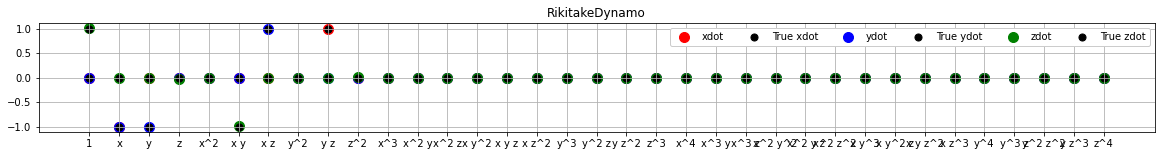

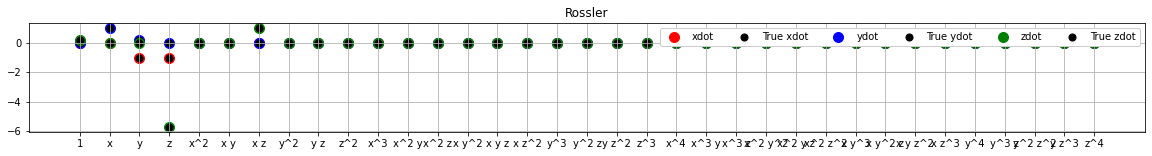

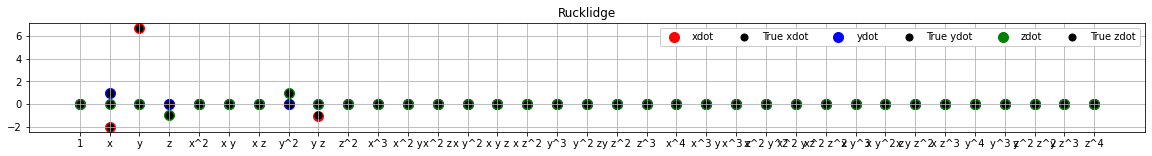

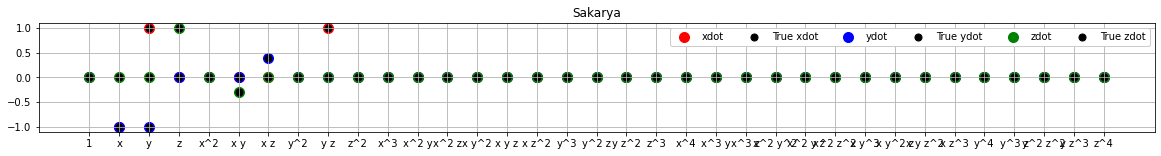

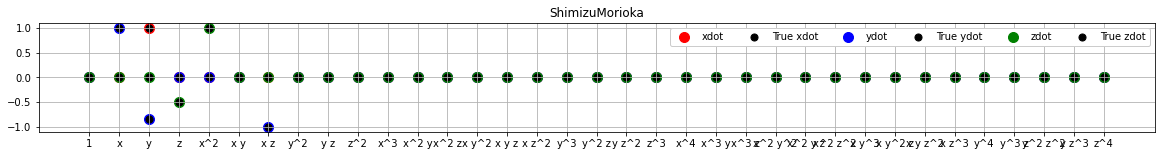

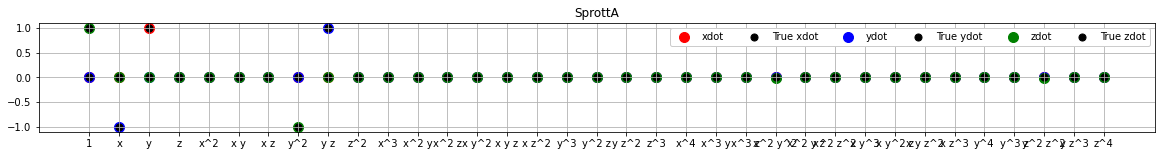

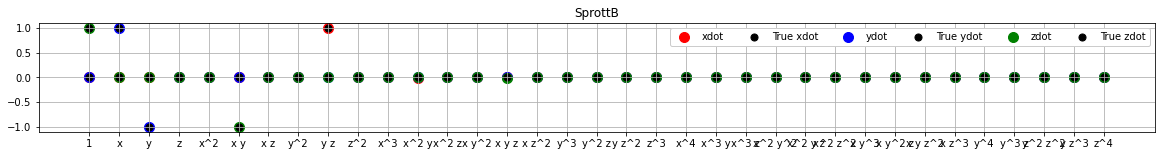

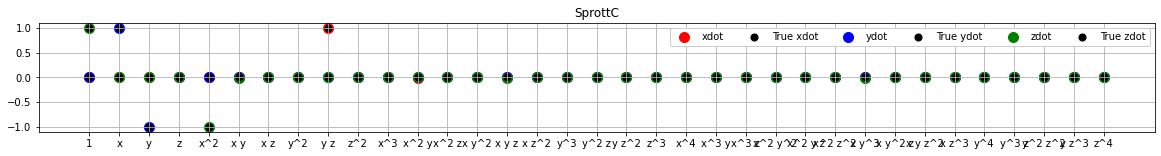

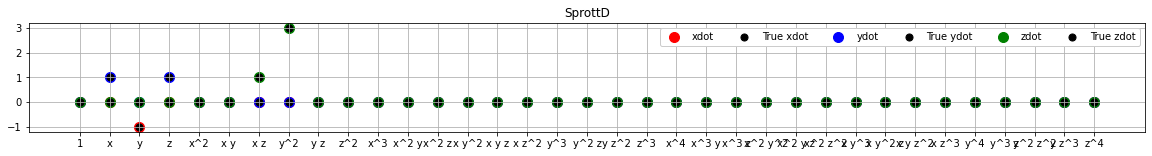

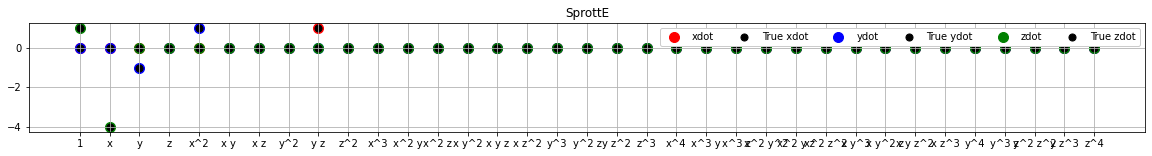

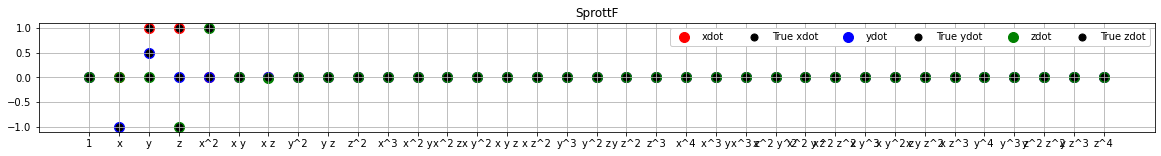

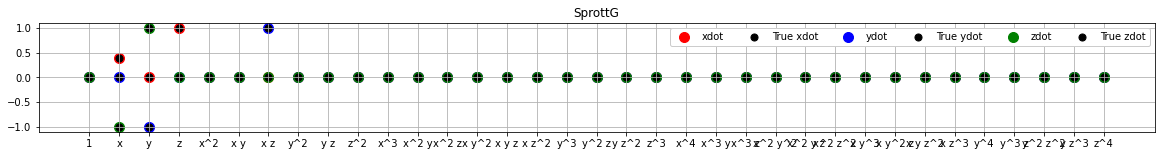

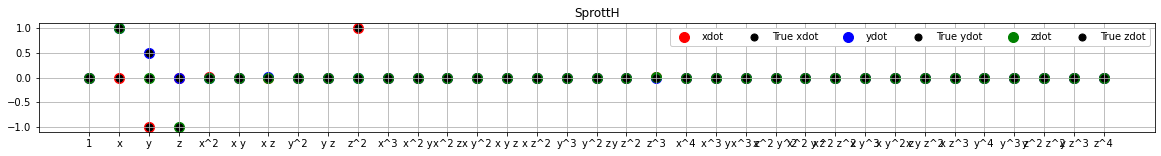

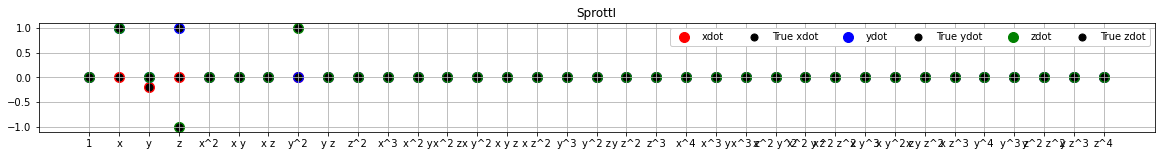

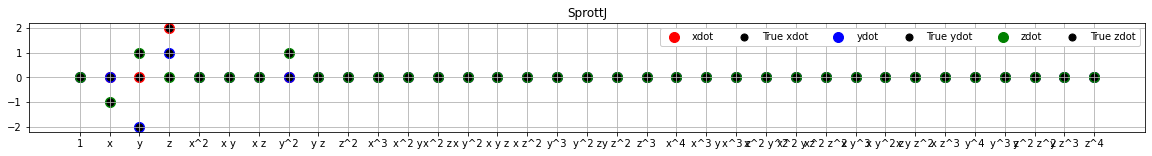

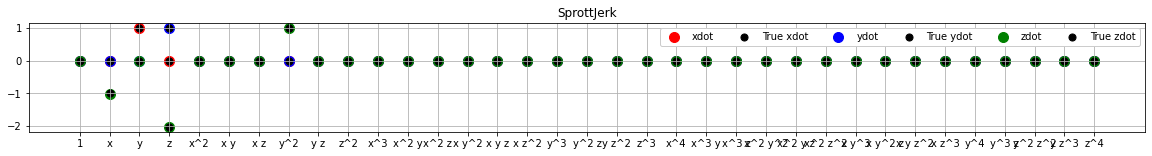

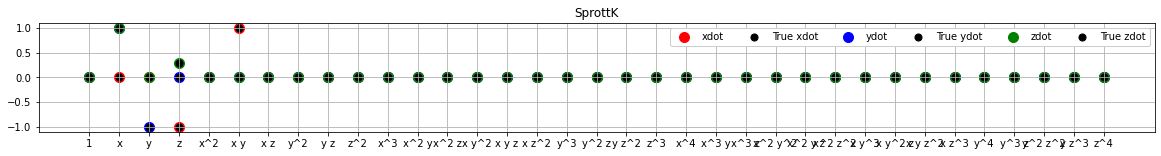

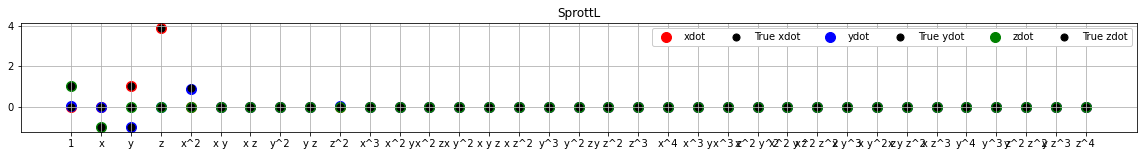

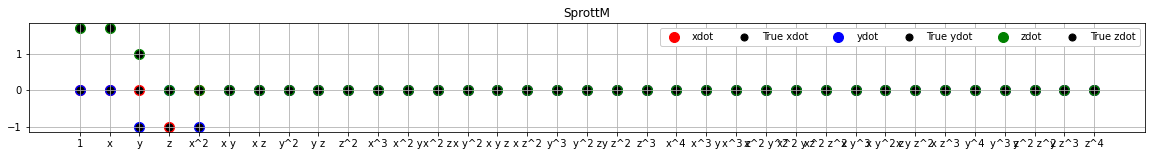

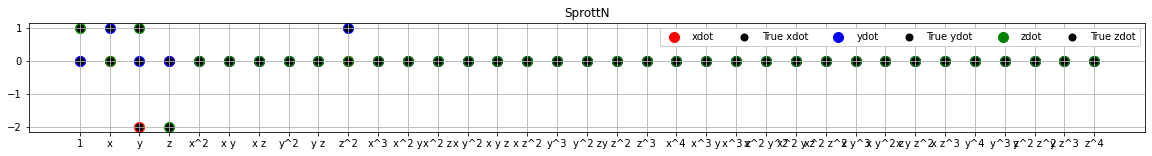

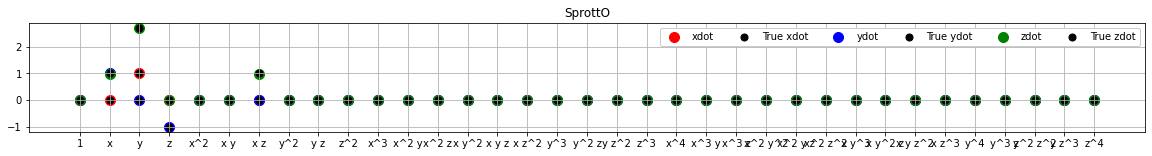

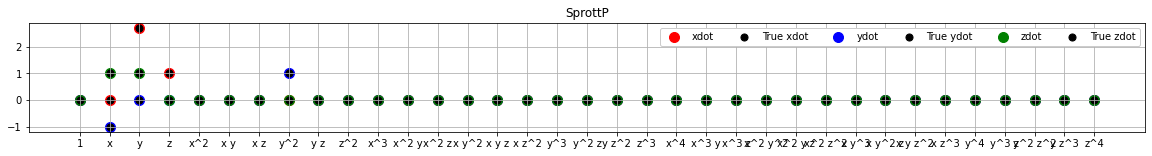

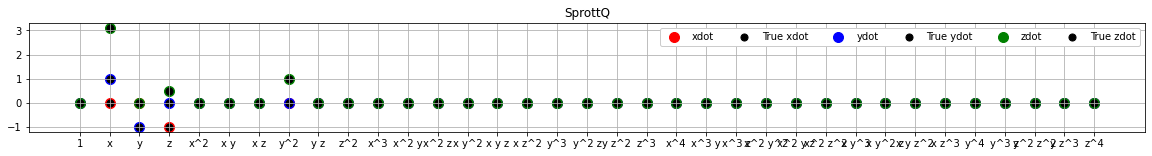

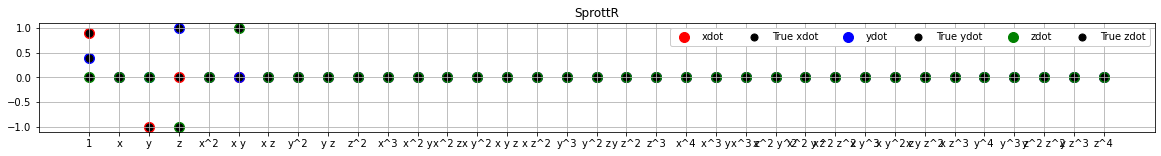

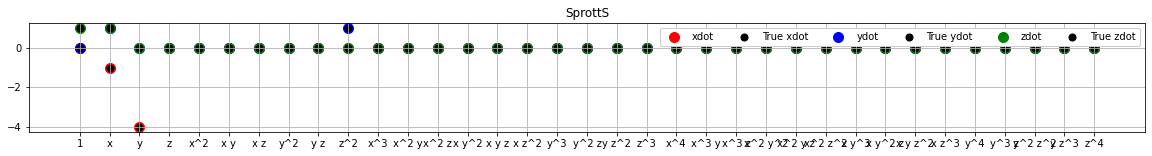

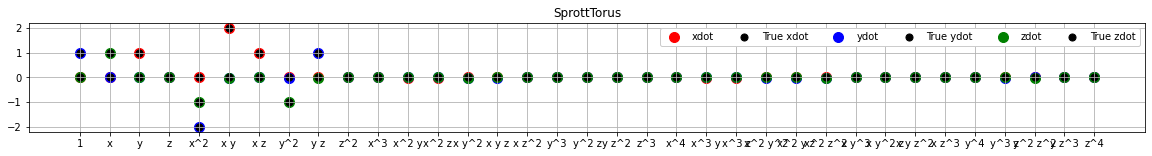

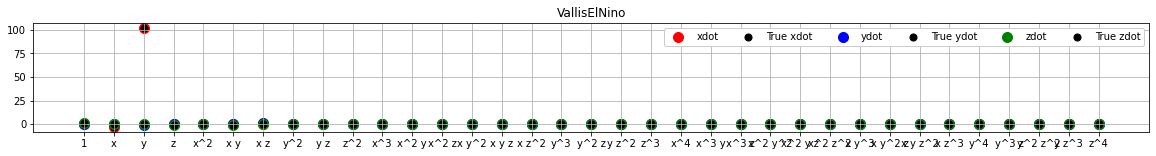

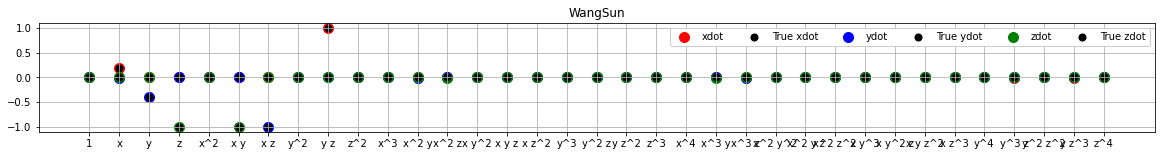

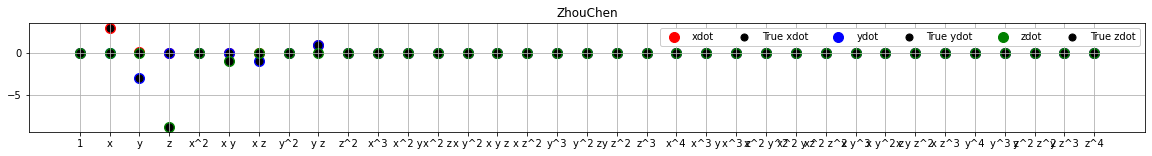

In [7]:
plot_individual_coef_errors(
    all_sols_train,
    predicted_coefficients,
    true_coefficients,
    dimension_list,
    systems_list,
    models
)

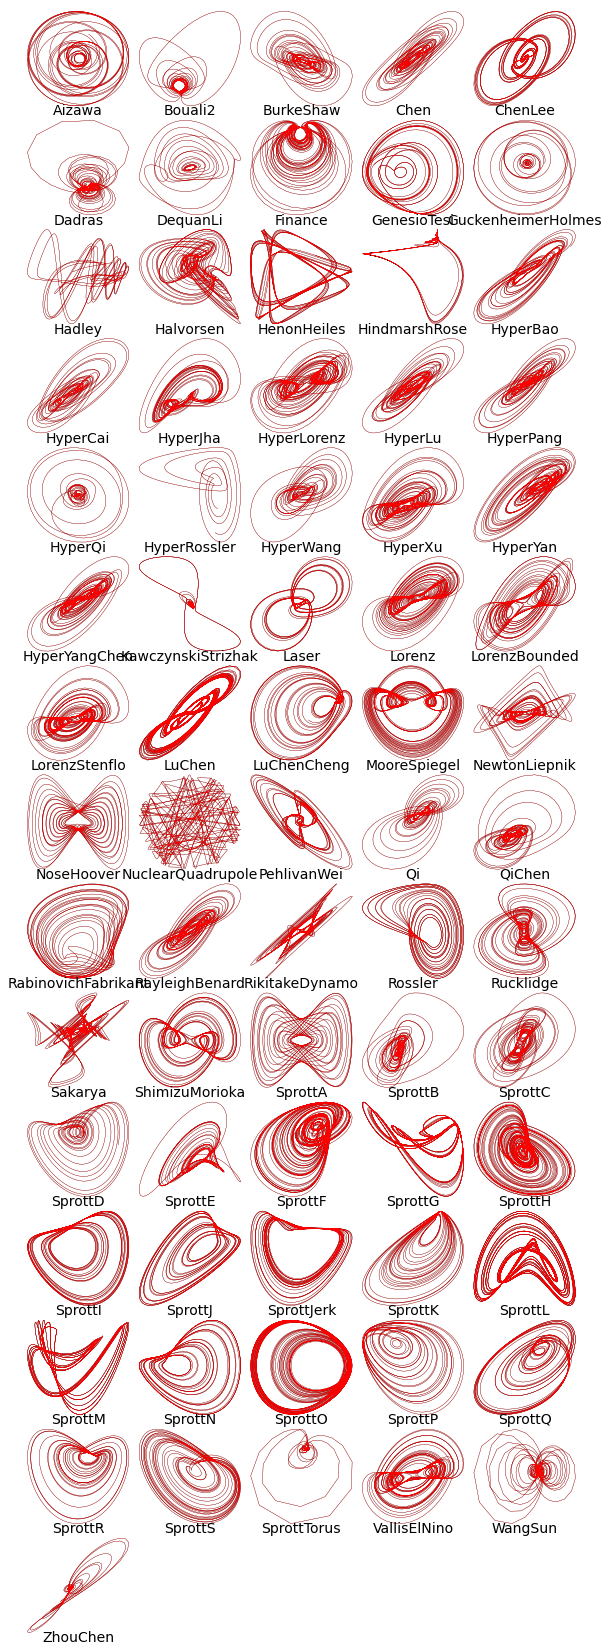

In [8]:

# Plot the training and testing trajectories for all the chaotic systems
num_cols = 5
num_rows = int(np.ceil(len(all_sols_train) / num_cols))
fig = plt.figure(figsize=(num_cols * 2, num_rows * 2))

gs = plt.matplotlib.gridspec.GridSpec(num_rows, num_cols)
gs.update(wspace=0.0, hspace=0.05) 

for i, attractor_name in enumerate(all_sols_train):
    x_dot_test = x_dot_tests[i]
    x_dot_test_pred = x_dot_test_preds[i]
    plt.subplot(gs[i])
    plt.plot(x_dot_test[:, 0], x_dot_test[:, 1], 'k'
                 , linewidth=0.25)
    plt.plot(x_dot_test_pred[:, 0], x_dot_test_pred[:, 1], 'r', linewidth=0.25)
    plt.title(attractor_name, y=-0.1, fontsize=14)
    plt.gca().axis('off')
    

# of dynamical systems that have < 10% coefficient error in the fit,  when , error * 100, % Gaussian noise is added to every trajectory point  67  /  71


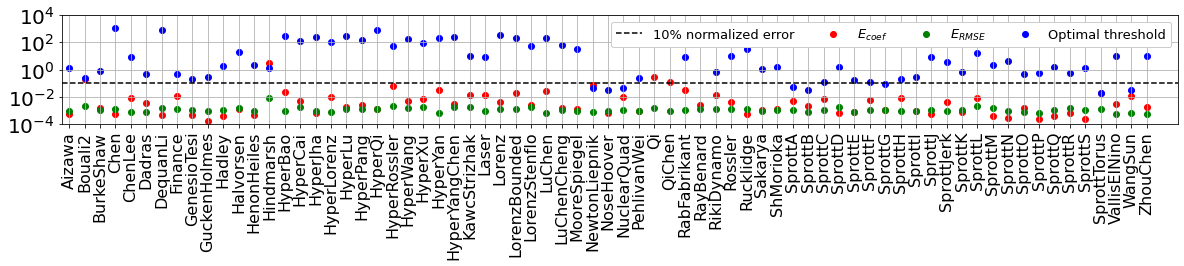

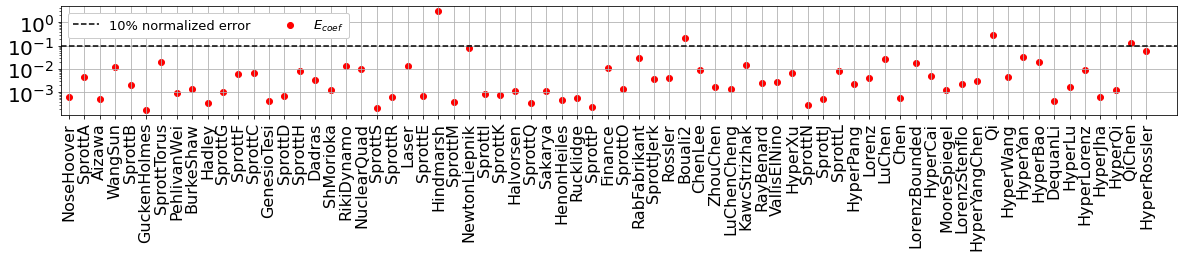

In [9]:
plot_coef_errors(
    all_sols_train,
    best_normalized_coef_errors,
    xdot_rmse_errors,
    best_threshold_values,
    condition_numbers, #scale_list,
    systems_list
)


## Okay, we have successfully found the Pareto optimal models for the given data. Now we build an ensemble of models with this "best threshold" and use the statistics of these models to conclude about the scale separation. 

In [10]:
# Follow up by doing an ensembling fit using this optimal threshold
# ensemble_coefs = {}
# poly_library = ps.PolynomialLibrary(degree=4)
# for i, attractor_name in enumerate(systems_list):
#     print(i, " / ", num_attractors, ", System = ", attractor_name)
    
#     x_train = all_sols_train[attractor_name]
#     t_train = all_t_train[attractor_name]

#     optimizer = ps.STLSQ(resample
#         threshold=best_threshold_values[attractor_name][0],
#         alpha=1e-5,
#         max_iter=100,
#         normalize_columns=True,
#         ridge_kw={"tol": 1e-10},
#     )
#     if dimension_list[i] == 3:
#         input_names = ['x', 'y', 'z']
#     else:
#         input_names = ['x', 'y', 'z', 'w']
#     model = ps.SINDy(
#         feature_library=poly_library, 
#         optimizer=optimizer, 
#         feature_names=input_names,
#     )
#     model.fit(x_train, t=t_train, quiet=True, ensemble=True, n_models=10)
#     ensemble_coefs[attractor_name] = model.coef_list

In [ ]:
x_pred, x_dot_pred, coef_lists = run_ensembling(
    systems_list,
    all_sols_train,
    all_t_train,
    test_trajectories, 
    test_trajectories_time,
    dimension_list,
    best_threshold_values,
    alpha=1e-5,
    optimizer_max_iter=100,
    normalize_columns=True,
    n_models=20,
)

(20, 3, 35)


In [ ]:
x_pred['Aizawa'].shape

In [ ]:
num_trajectories = x_pred['Aizawa'].shape[2]
num_models = x_pred['Aizawa'].shape[1]
for i in range(num_models):
    for j in range(num_trajectories):
        plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot(test_trajectories['Aizawa'][:, j, 0], test_trajectories['Aizawa'][:, j, 1], test_trajectories['Aizawa'][:, j, 2], 'k')
        ax.plot(x_pred['Aizawa'][:, i, j, 0], x_pred['Aizawa'][:, i, j, 1], x_pred['Aizawa'][:, i, j, 2], 'r')


In [ ]:
test_trajectories['Aizawa'].shape